In [1]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings

warnings.filterwarnings("ignore")

In [2]:
os.listdir("./input")

['dataset', 'voice_commands']

In [3]:
char_map_str = """
ঀ 0
ঁ 1
ং 2
ঃ 3
অ 4
আ 5
ই 6
ঈ 7
উ 8
ঊ 9
ঋ 10
ঌ 11
এ 12
ঐ 13
ও 14
ঔ 15
ক 16
খ 17
গ 18
ঘ 19
ঙ 20
চ 21
ছ 22
জ 23
ঝ 24
ঞ 25
ট 26
ঠ 27
ড 28
ঢ 29
ণ 30
ত 31
থ 32
দ 33
ধ 34
ন 35
প 36
ফ 37
ব 38
ভ 39
ম 40
য 41
ৰ 42
ল 43
শ 44
ষ 45
স 46
হ 47
় 48
ঽ 49
া 50
ি 51
ী 52
ু 53
ূ 54
ৃ 55
ৄ 56
ে 57
ৈ 58
ো 59
ৌ 60
্ 61
ৎ 62
ৗ 63
ড় 64
ঢ় 65
য় 66
ৠ 67
০ 68
১ 69
২ 70
৩ 71
৪ 72
৫ 73
৬ 74
৭ 75
৮ 76
৯ 77
ৱ 78
৲ 79
৴ 80
<SPACE> 81
"""
# the "blank" character is mapped to 84
char_map = {}
index_map = {}
for line in char_map_str.strip().split('\n'):
    ch, index = line.split()
    char_map[ch] = int(index)
    index_map[int(index)] = ch
index_map[81] = ' '

In [4]:
print(char_map)
print("****************************************************")
print(index_map)

{'ঀ': 0, 'ঁ': 1, 'ং': 2, 'ঃ': 3, 'অ': 4, 'আ': 5, 'ই': 6, 'ঈ': 7, 'উ': 8, 'ঊ': 9, 'ঋ': 10, 'ঌ': 11, 'এ': 12, 'ঐ': 13, 'ও': 14, 'ঔ': 15, 'ক': 16, 'খ': 17, 'গ': 18, 'ঘ': 19, 'ঙ': 20, 'চ': 21, 'ছ': 22, 'জ': 23, 'ঝ': 24, 'ঞ': 25, 'ট': 26, 'ঠ': 27, 'ড': 28, 'ঢ': 29, 'ণ': 30, 'ত': 31, 'থ': 32, 'দ': 33, 'ধ': 34, 'ন': 35, 'প': 36, 'ফ': 37, 'ব': 38, 'ভ': 39, 'ম': 40, 'য': 41, 'ৰ': 42, 'ল': 43, 'শ': 44, 'ষ': 45, 'স': 46, 'হ': 47, '়': 48, 'ঽ': 49, 'া': 50, 'ি': 51, 'ী': 52, 'ু': 53, 'ূ': 54, 'ৃ': 55, 'ৄ': 56, 'ে': 57, 'ৈ': 58, 'ো': 59, 'ৌ': 60, '্': 61, 'ৎ': 62, 'ৗ': 63, 'ড়': 64, 'ঢ়': 65, 'য়': 66, 'ৠ': 67, '০': 68, '১': 69, '২': 70, '৩': 71, '৪': 72, '৫': 73, '৬': 74, '৭': 75, '৮': 76, '৯': 77, 'ৱ': 78, '৲': 79, '৴': 80, '<SPACE>': 81}
****************************************************
{0: 'ঀ', 1: 'ঁ', 2: 'ং', 3: 'ঃ', 4: 'অ', 5: 'আ', 6: 'ই', 7: 'ঈ', 8: 'উ', 9: 'ঊ', 10: 'ঋ', 11: 'ঌ', 12: 'এ', 13: 'ঐ', 14: 'ও', 15: 'ঔ', 16: 'ক', 17: 'খ', 18: 'গ', 19: 'ঘ', 20: 'ঙ', 21: 'চ', 22: 'ছ', 23: 'জ', 24: '

In [5]:
def get_number_of_char_classes(char_map):
    ## TODO would be better to check with dataset (once cleaned)
    num_classes = len(char_map)+1 #need +1 for ctc null char +1 pad
    return num_classes
get_number_of_char_classes(char_map)

83

In [6]:
def text_to_int_sequence(text):
    """ Convert text to an integer sequence """
    int_sequence = []
    for c in text:
        if c == ' ':
            ch = char_map['<SPACE>']
        else:
            ch = char_map[c]
        int_sequence.append(ch)
    return int_sequence
def int_sequence_to_text(int_sequence):
    """ Convert an integer sequence to text """
    text = []
    str1 = ""
    for c in int_sequence:
        ch = index_map[c]
        text.append(ch)
    for ele in text: 
        str1 += ele 
    return str1
int_sequence = text_to_int_sequence("তুমাৰ")
int_sequence_to_text(int_sequence)

'তুমাৰ'

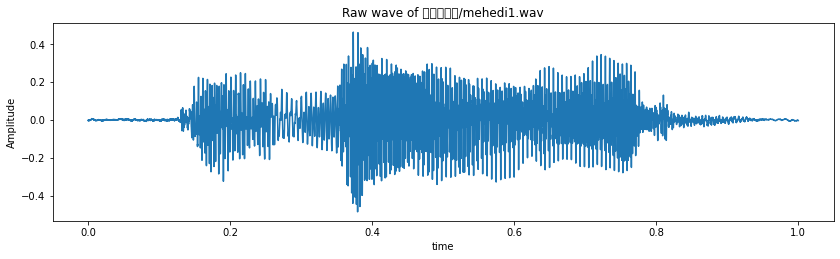

In [7]:
train_audio_path = './input/dataset/train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'তুমাৰ/mehedi1.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
text = int_sequence_to_text(text_to_int_sequence("তুমাৰ"))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' +text+'/mehedi1.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [8]:
ipd.Audio(samples, rate=sample_rate)

In [9]:
print(sample_rate)

16000


In [10]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

In [11]:
labels=os.listdir(train_audio_path)

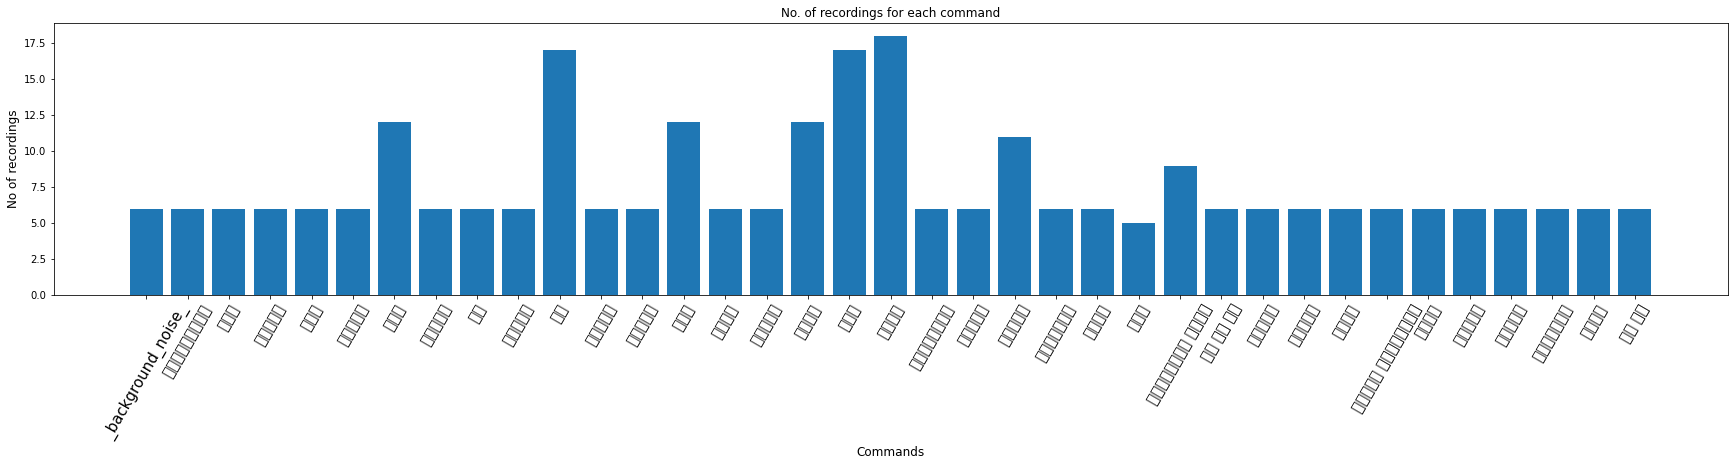

In [12]:
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [13]:
labels=['অনুসন্ধান',
 'আজি',
 'আবৃতি',
 'আৰু',
 'ইউটুব',
 'এটা',
 'এতিয়া',
 'কত',
 'কবিতা',
 'কি',
 'কিমান',
 'কেইটা',
 'কোন',
 'কোৱা',
 'কৌতুক',
 'ক্ৰম',
 'কৰা',
 'খোলা',
 'গুৱাহাটী',
 'তাৰিখ',
 'তুমাৰ',
 'দাওনলোদ',
 'দিয়া',
 'নাম',
 'নৰেন্দ্ৰ মোদী',
 'পি দি এফ',
 'পৰিচয়',
 'বজোৱা',
 'বাজে',
 'বিশ্ব বিদ্যালয়',
 'বিহু',
 'ভূপেন',
 'সংগীত',
 'হাজৰিকা',
 'হাতী',
 'ৰং ঘৰ']


(array([  1.,   0., 272.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.5874375 , 0.76975625, 0.952075  , 1.13439375, 1.3167125 ,
        1.49903125, 1.68135   , 1.86366875, 2.0459875 , 2.22830625,
        2.410625  ]),
 <BarContainer object of 10 artists>)

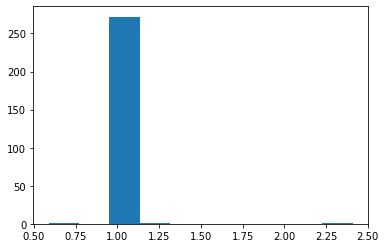

In [14]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [15]:
train_audio_path = './input/dataset/train/audio'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

অনুসন্ধান
আজি
আবৃতি
আৰু
ইউটুব
এটা
এতিয়া
কত
কবিতা
কি
কিমান
কেইটা
কোন
কোৱা
কৌতুক
ক্ৰম
কৰা
খোলা
গুৱাহাটী
তাৰিখ
তুমাৰ
দাওনলোদ
দিয়া
নাম
নৰেন্দ্ৰ মোদী
পি দি এফ
পৰিচয়
বজোৱা
বাজে
বিশ্ব বিদ্যালয়
বিহু
ভূপেন
সংগীত
হাজৰিকা
হাতী
ৰং ঘৰ


In [16]:
waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]

In [40]:
all_label

['অনুসন্ধান',
 'অনুসন্ধান',
 'অনুসন্ধান',
 'অনুসন্ধান',
 'অনুসন্ধান',
 'অনুসন্ধান',
 'আজি',
 'আজি',
 'আজি',
 'আজি',
 'আজি',
 'আবৃতি',
 'আবৃতি',
 'আবৃতি',
 'আবৃতি',
 'আবৃতি',
 'আবৃতি',
 'আৰু',
 'আৰু',
 'আৰু',
 'আৰু',
 'আৰু',
 'আৰু',
 'ইউটুব',
 'ইউটুব',
 'ইউটুব',
 'ইউটুব',
 'ইউটুব',
 'ইউটুব',
 'এটা',
 'এটা',
 'এটা',
 'এটা',
 'এটা',
 'এটা',
 'এটা',
 'এটা',
 'এটা',
 'এটা',
 'এটা',
 'এটা',
 'এতিয়া',
 'এতিয়া',
 'এতিয়া',
 'এতিয়া',
 'এতিয়া',
 'এতিয়া',
 'কত',
 'কত',
 'কত',
 'কত',
 'কত',
 'কত',
 'কবিতা',
 'কবিতা',
 'কবিতা',
 'কবিতা',
 'কবিতা',
 'কবিতা',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কি',
 'কিমান',
 'কিমান',
 'কিমান',
 'কিমান',
 'কিমান',
 'কিমান',
 'কেইটা',
 'কেইটা',
 'কেইটা',
 'কেইটা',
 'কেইটা',
 'কেইটা',
 'কোন',
 'কোন',
 'কোন',
 'কোন',
 'কোন',
 'কোন',
 'কোন',
 'কোন',
 'কোন',
 'কোন',
 'কোন',
 'কোন',
 'কোৱা',
 'কোৱা',
 'কোৱা',
 'কোৱা',
 'কোৱা',
 'কোৱা',
 'কৌতুক',
 'কৌতুক',
 'কৌতুক',
 'কৌতুক',
 'কৌতুক',
 'কৌতুক',
 

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [18]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [19]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [20]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),
                                            stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [21]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 16)          0         
 1D)                                                         

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [24]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
7/7 [==============================] - 5s 384ms/step - loss: 3.5943 - accuracy: 0.0230 - val_loss: 3.5652 - val_accuracy: 0.0727
Epoch 2/100
7/7 [==============================] - 2s 273ms/step - loss: 3.5489 - accuracy: 0.0691 - val_loss: 3.5405 - val_accuracy: 0.1455
Epoch 3/100
7/7 [==============================] - 2s 267ms/step - loss: 3.4917 - accuracy: 0.0783 - val_loss: 3.4704 - val_accuracy: 0.1091
Epoch 4/100
7/7 [==============================] - 2s 272ms/step - loss: 3.4421 - accuracy: 0.1014 - val_loss: 3.4480 - val_accuracy: 0.1636
Epoch 5/100
7/7 [==============================] - 2s 277ms/step - loss: 3.3797 - accuracy: 0.0829 - val_loss: 3.3732 - val_accuracy: 0.1455
Epoch 6/100
7/7 [==============================] - 2s 288ms/step - loss: 3.3538 - accuracy: 0.0783 - val_loss: 3.3957 - val_accuracy: 0.0909
Epoch 7/100
7/7 [==============================] - 2s 269ms/step - loss: 3.3057 - accuracy: 0.1106 - val_loss: 3.3379 - val_accuracy: 0.1455
Epoch 8/100
7

7/7 [==============================] - 2s 267ms/step - loss: 1.3663 - accuracy: 0.5484 - val_loss: 3.1211 - val_accuracy: 0.2727
Epoch 29/100
7/7 [==============================] - 2s 266ms/step - loss: 1.4932 - accuracy: 0.5346 - val_loss: 3.0193 - val_accuracy: 0.3273
Epoch 30/100
7/7 [==============================] - 2s 283ms/step - loss: 1.5115 - accuracy: 0.5161 - val_loss: 2.9386 - val_accuracy: 0.3091
Epoch 31/100
7/7 [==============================] - 2s 286ms/step - loss: 1.2365 - accuracy: 0.6083 - val_loss: 3.0129 - val_accuracy: 0.3091
Epoch 32/100
7/7 [==============================] - 2s 286ms/step - loss: 1.2453 - accuracy: 0.6175 - val_loss: 2.9858 - val_accuracy: 0.2364
Epoch 33/100
7/7 [==============================] - 2s 266ms/step - loss: 1.0509 - accuracy: 0.6728 - val_loss: 3.1181 - val_accuracy: 0.3455
Epoch 34/100
7/7 [==============================] - 2s 272ms/step - loss: 1.0664 - accuracy: 0.6498 - val_loss: 3.1215 - val_accuracy: 0.3455
Epoch 35/100
7/7 [=

In [27]:
model.save("cnn-assamese.h5")

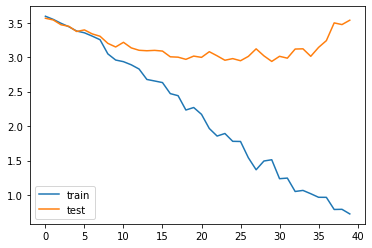

In [28]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [30]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: এতিয়া


In [31]:
print("Text:",predict(samples))

1/1 [==============================] - 1s 509ms/step
Text: খোলা


In [32]:
os.listdir('./input/voice_commands/mehedi')

['demo_0.wav',
 'demo_1.wav',
 'file.wav',
 'final2.wav',
 'final3.wav',
 'iftikar1.wav',
 'mehedi4.wav',
 'Mehtab1.wav',
 'out_sine.wav',
 'out_sine1.wav',
 'pouranika4.wav']

In [33]:
filepath='./input/voice_commands/mehedi'

In [36]:
samples, sample_rate = librosa.load(filepath + '/' + 'Mehtab1.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples,rate=8000) 

In [37]:
predict(samples)

1/1 [==============================] - 0s 28ms/step


'তুমাৰ'